# Predictive Model for Gold Recovery

# Introduction 
Zyfra, a company specializing in efficiency solutions for heavy industry, has embarked on a project to develop a machine learning model that predicts the amount of gold recovered from gold ore. This model aims to optimize production processes and eliminate unprofitable parameters, thereby enhancing overall efficiency.

To achieve this, the project will involve the following steps:

Data Preparation: Collect and preprocess data related to gold extraction and purification.

Data Analysis: Perform thorough data analysis to understand key patterns and insights.

Model Development and Training: Develop and train a machine learning model to accurately predict gold recovery.

This initiative will leverage advanced machine learning techniques to provide actionable insights, ultimately driving better decision-making and operational improvements in gold recovery processes.

**1-Prepare the data**

In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.utils import resample
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.model_selection import KFold


In [4]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
df_test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True) 
gold_df = pd.read_csv('/datasets/gold_recovery_full.csv', parse_dates=True, index_col='date')

In [5]:
df_train.shape, df_test.shape

((16860, 86), (5856, 52))

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

In [8]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                     

In [9]:
df_train.duplicated().sum()

16

In [10]:
df_test.duplicated().sum()

6

In [11]:
gold_df.duplicated().sum()

22

In [12]:
def calculate_missing_values(df):
    missing_values = df.isnull().sum()
    total_values = np.product(df.shape)
    missing_percent = (missing_values / total_values) * 100
    return missing_percent

missing_percent_df_train = calculate_missing_values(df_train)
missing_percent_df_test = calculate_missing_values(df_test)
missing_percent_gold_df = calculate_missing_values(gold_df)

print("Missing values in df1:\n", missing_percent_df_train)
print("Missing values in df2:\n", missing_percent_df_test)
print("Missing values in df3:\n", missing_percent_gold_df)

Missing values in df1:
 final.output.concentrate_ag                   0.004966
final.output.concentrate_pb                   0.004966
final.output.concentrate_sol                  0.025518
final.output.concentrate_au                   0.004897
final.output.recovery                         0.104899
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.005862
secondary_cleaner.state.floatbank5_b_air      0.005862
secondary_cleaner.state.floatbank5_b_level    0.005793
secondary_cleaner.state.floatbank6_a_air      0.007104
secondary_cleaner.state.floatbank6_a_level    0.005862
Length: 86, dtype: float64
Missing values in df2:
 primary_cleaner.input.sulfate                 0.099175
primary_cleaner.input.depressant              0.093264
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.054513
primary_cleaner.state.floatbank8_a_air        0.005254
primary_cleaner.state.floatbank8_a_level     

In [13]:
missing_percent_df_train_5_or_more = missing_percent_df_train[missing_percent_df_train >=0.05]*100
missing_percent_df_train_5_or_more

final.output.recovery                 10.489945
primary_cleaner.input.sulfate          9.014042
primary_cleaner.input.depressant       8.703688
primary_cleaner.input.xanthate         6.793291
rougher.calculation.au_pb_ratio        8.565754
rougher.input.floatbank10_sulfate      7.200199
rougher.input.floatbank11_xanthate    13.131397
rougher.output.recovery               17.745317
rougher.output.tail_ag                15.517669
rougher.output.tail_sol               15.510773
rougher.output.tail_au                15.510773
secondary_cleaner.output.tail_sol     13.696930
dtype: float64

In [14]:
missing_percent_df_test_5_or_more = missing_percent_df_test[missing_percent_df_test >=0.05]*100
missing_percent_df_test_5_or_more

primary_cleaner.input.sulfate          9.917507
primary_cleaner.input.depressant       9.326398
primary_cleaner.input.xanthate         5.451345
rougher.input.floatbank10_sulfate      8.439733
rougher.input.floatbank11_xanthate    11.592318
dtype: float64

In [15]:
missing_percent_gold_df_5_or_more = missing_percent_gold_df[missing_percent_gold_df >=0.05]*100
missing_percent_gold_df_5_or_more

final.output.recovery                 10.048240
primary_cleaner.input.sulfate          8.236178
primary_cleaner.input.depressant       7.913693
primary_cleaner.input.xanthate         5.891760
rougher.calculation.au_pb_ratio        8.328317
rougher.input.floatbank10_sulfate      6.659582
rougher.input.floatbank11_xanthate    11.553172
rougher.output.recovery               15.965593
rougher.output.tail_ag                14.010205
rougher.output.tail_sol               14.005086
rougher.output.tail_au                14.005086
secondary_cleaner.output.tail_sol     11.338182
dtype: float64

In [16]:
# Check the formula: whether the calculation result matches the provided data.

def recovery_calc(row):
    numerator = row['rougher.output.concentrate_au']*(row['rougher.input.feed_au']-row['rougher.output.tail_au'])
    denominator = row['rougher.input.feed_au']*(row['rougher.output.concentrate_au']-row['rougher.output.tail_au'])
    return numerator/denominator*100

df_formula = df_train.copy()
df_formula['formula'] = df_formula.apply(lambda x: recovery_calc(x), axis=1)

answer = (df_formula['formula'] - df_formula['rougher.output.recovery']).abs().mean()

print('Difference between the expected value and measured value is {}'.format(answer))

/tmp/ipykernel_302/3300051670.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return numerator/denominator*100
/tmp/ipykernel_302/3300051670.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return numerator/denominator*100


Difference between the expected value and measured value is 9.303415616264301e-15


In [17]:
df_train = df_train.fillna(method='ffill')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16860 non-null  float64
 1   final.output.concentrate_pb                         16860 non-null  float64
 2   final.output.concentrate_sol                        16860 non-null  float64
 3   final.output.concentrate_au                         16860 non-null  float64
 4   final.output.recovery                               16860 non-null  float64
 5   final.output.tail_ag                                16860 non-null  float64
 6   final.output.tail_pb                                16860 non-null  float64
 7   final.output.tail_sol                               16860 non-null  float64
 8   final.output.tail_au                     

In [18]:
df_test.fillna(method='ffill')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

In [19]:
gold_df.isnull().mean().sort_values(ascending=False).head(10)

rougher.output.recovery               0.137304
rougher.output.tail_ag                0.120488
rougher.output.tail_sol               0.120444
rougher.output.tail_au                0.120444
rougher.input.floatbank11_xanthate    0.099357
secondary_cleaner.output.tail_sol     0.097508
final.output.recovery                 0.086415
rougher.calculation.au_pb_ratio       0.071624
primary_cleaner.input.sulfate         0.070831
primary_cleaner.input.depressant      0.068058
dtype: float64

In [20]:
missed_test_columns = set(list(df_train.columns.values))-set(list(df_test.columns.values))
missed_test_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

# 2- Analyze the data

Text(0.5, 1.0, 'Gold concentration change')

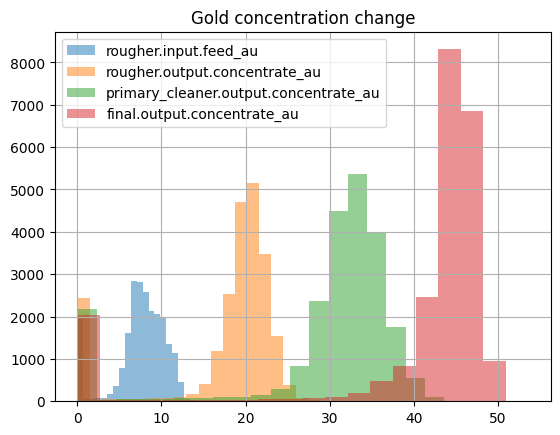

In [21]:
steps_template = [
    'rougher.input.feed_{}',
    'rougher.output.concentrate_{}',
    'primary_cleaner.output.concentrate_{}',
    'final.output.concentrate_{}',
]

def plot_concentrate_progress(component):
    steps = [s.format(component) for s in steps_template]
    for step in steps:
        gold_df[step].hist(alpha=0.5, bins=20)
    plt.legend(steps)

plot_concentrate_progress('au')
plt.title('Gold concentration change')

Text(0.5, 1.0, 'Silver concentration change')

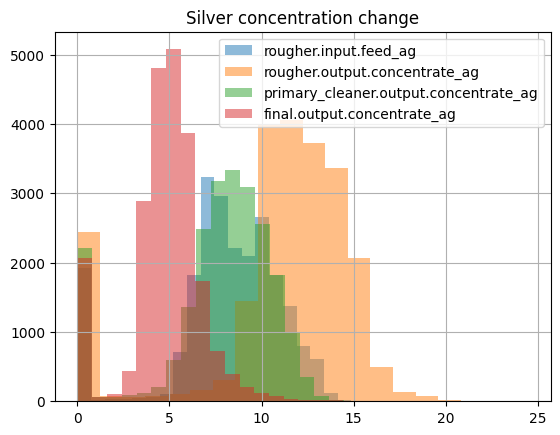

In [22]:
plot_concentrate_progress('ag')
plt.title('Silver concentration change')

Text(0.5, 1.0, 'Lead concentration change')

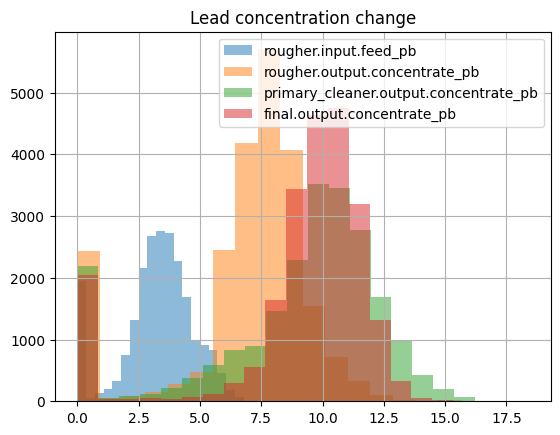

In [23]:
plot_concentrate_progress('pb')
plt.title('Lead concentration change')

**Gold (Au) Concentration**

Rougher Input Feed: The initial concentration of gold is relatively high, with a broad distribution.

Rougher: After the rougher stage, the concentration of gold decreases slightly, indicating some purification.

Primary Cleaner: The concentration continues to decrease, showing further purification.

Final: The final stage shows the lowest concentration of gold, indicating the highest level of purification.

**Silver (Ag) Concentration**

Rougher Input Feed: The initial concentration of silver is high, with a wide distribution.

Rougher: The concentration decreases significantly after the rougher stage.

Primary Cleaner: The concentration continues to drop, showing effective purification.

Final: The final stage has the lowest concentration of silver, indicating successful purification.

**Lead (Pb) Concentration**

Rougher Input Feed: The initial concentration of lead is high, with a broad distribution.

Rougher: The concentration decreases after the rougher stage.

Primary Cleaner: The concentration continues to decrease, showing further purification.

Final: The final stage shows the lowest concentration of lead, indicating effective purification.

**Overall Observations**

Effectiveness of Purification: Each stage of purification effectively reduces the concentration of metals (Au, Ag, Pb). The final stage consistently shows the lowest concentrations, indicating the highest level of purification.

Distribution Patterns: The histograms show that the distribution of metal concentrations becomes narrower and shifts towards lower values as the material progresses through the purification stages. This indicates that the purification process is not only reducing the average concentration but also making the distribution more uniform.

In [24]:
def filter_outliers(series):
    return series[series.between(series.quantile(0.01), series.quantile(0.99))]

def compare_train_test_feature(feature):
    filter_outliers(df_train[feature]).plot.kde()
    filter_outliers(df_test[feature]).plot.kde()
    plt.legend(['train', 'test'])

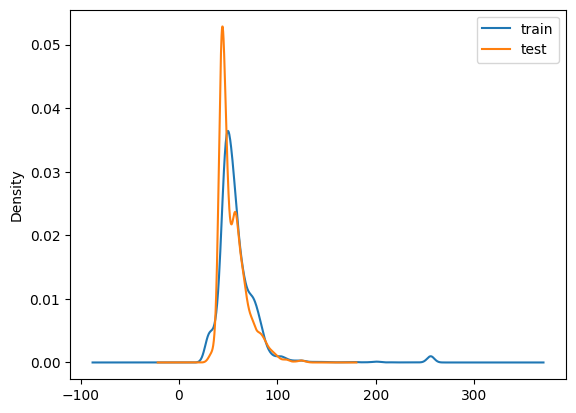

In [25]:
compare_train_test_feature('rougher.input.feed_size')

Both lines peak sharply near zero on the x-axis, indicating that most values in both datasets are concentrated around zero. The ‘train’ line peaks slightly higher than the ‘test’ line, suggesting that the training data has a slightly higher density of values near zero compared to the test data. This similarity in distribution patterns between the training and test sets is important for ensuring that the model trained on the training data will perform well on the test data.

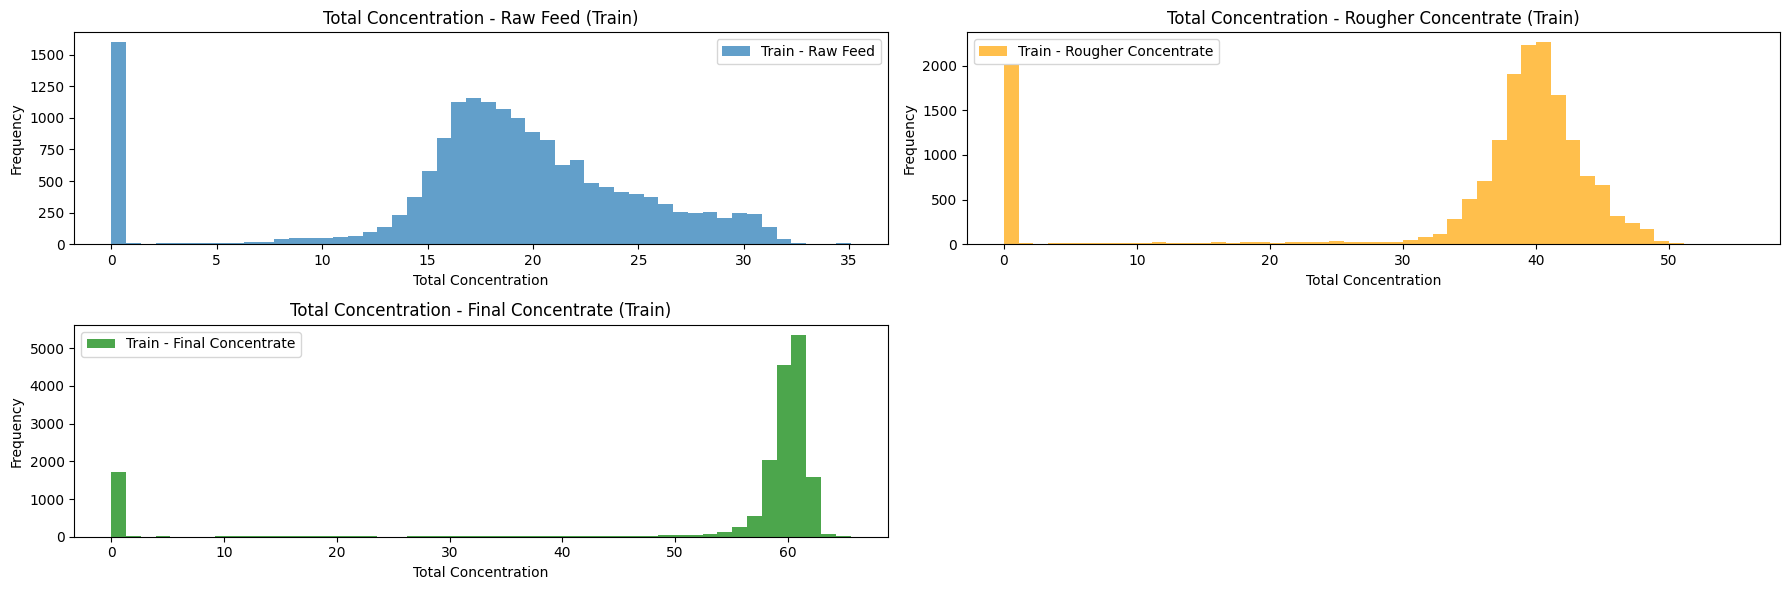

In [26]:
# Calculate total concentrations at each stage for train set
df_train['total_concentration_raw_feed'] = df_train[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)
df_train['total_concentration_rougher'] = df_train[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']].sum(axis=1)
df_train['total_concentration_final'] = df_train[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']].sum(axis=1)

# Plot the total concentrations
plt.figure(figsize=(18, 6))

# Training set
plt.subplot(2, 2, 1)
plt.hist(df_train['total_concentration_raw_feed'], bins=50, alpha=0.7, label='Train - Raw Feed')
plt.title('Total Concentration - Raw Feed (Train)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df_train['total_concentration_rougher'], bins=50, alpha=0.7, label='Train - Rougher Concentrate', color='orange')
plt.title('Total Concentration - Rougher Concentrate (Train)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(df_train['total_concentration_final'], bins=50, alpha=0.7, label='Train - Final Concentrate', color='green')
plt.title('Total Concentration - Final Concentrate (Train)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

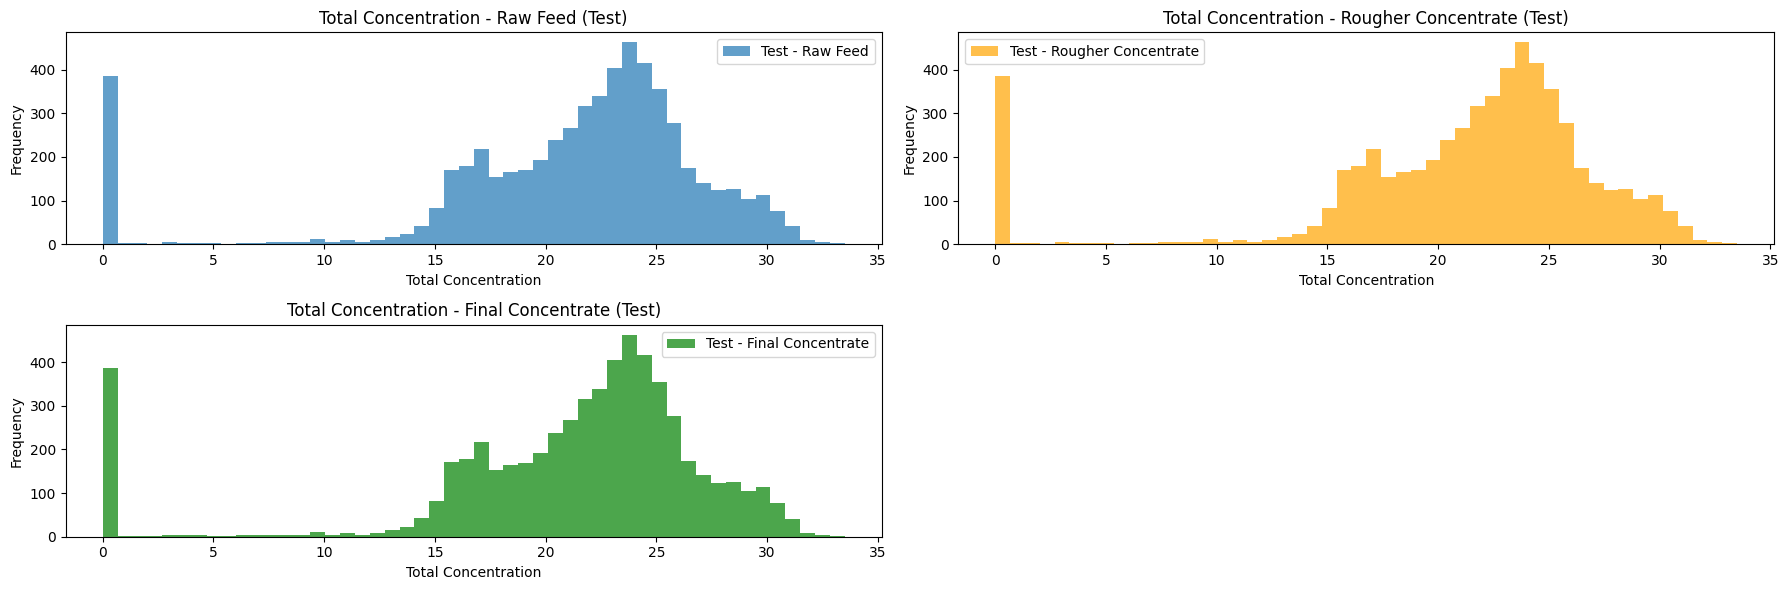

In [27]:
# Calculate total concentrations at each stage for test set
df_test['total_concentration_raw_feed'] = df_test[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)
df_test['total_concentration_rougher'] = df_test[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)
df_test['total_concentration_final'] = df_test[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)

# Plot the total concentrations
plt.figure(figsize=(18, 6))

# Test set
plt.subplot(2, 2, 1)
plt.hist(df_test['total_concentration_raw_feed'], bins=50, alpha=0.7, label='Test - Raw Feed')
plt.title('Total Concentration - Raw Feed (Test)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df_test['total_concentration_rougher'], bins=50, alpha=0.7, label='Test - Rougher Concentrate', color='orange')
plt.title('Total Concentration - Rougher Concentrate (Test)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(df_test['total_concentration_final'], bins=50, alpha=0.7, label='Test - Final Concentrate', color='green')
plt.title('Total Concentration - Final Concentrate (Test)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
df_train['total_concentration_raw_feed'] = df_train[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)
df_train['total_concentration_rougher'] = df_train[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']].sum(axis=1)
df_train['total_concentration_final'] = df_train[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']].sum(axis=1)

# Calculate total concentrations at each stage for test set
df_test['total_concentration_raw_feed'] = df_test[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)
df_test['total_concentration_rougher'] = df_test[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)
df_test['total_concentration_final'] = df_test[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)

# Remove rows with zero concentration values
df_train = df_train[(df_train['total_concentration_raw_feed'] > 0) & 
                    (df_train['total_concentration_rougher'] > 0) & 
                    (df_train['total_concentration_final'] > 0)]

df_test = df_test[(df_test['total_concentration_raw_feed'] > 0) & 
                  (df_test['total_concentration_rougher'] > 0) & 
                  (df_test['total_concentration_final'] > 0)]

# Save the cleaned datasets
df_train.to_csv('gold_recovery_train_cleaned.csv', index=False)
df_test.to_csv('gold_recovery_test_cleaned.csv', index=False)

print("Zero concentration values removed and cleaned datasets saved.")

Zero concentration values removed and cleaned datasets saved.


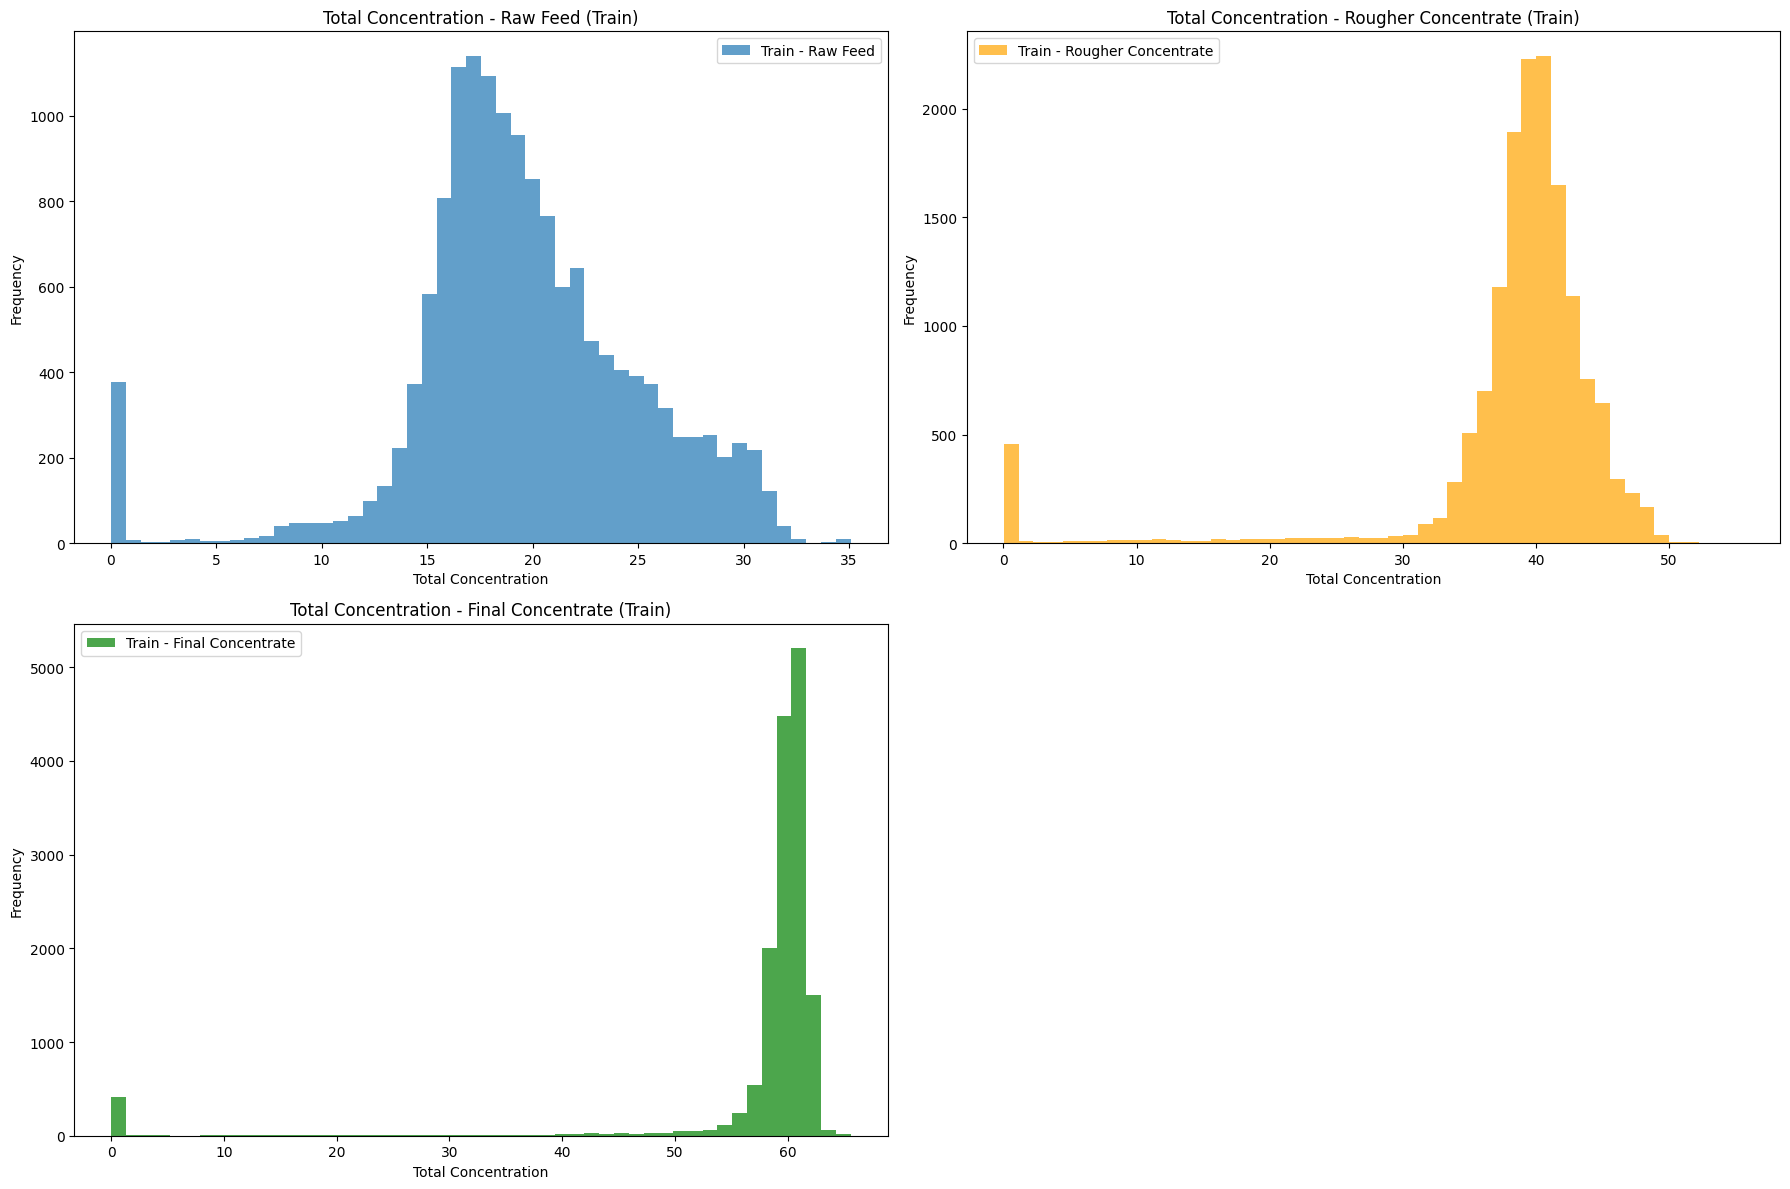

In [29]:
plt.figure(figsize=(18, 12))

# Training set
plt.subplot(2, 2, 1)
plt.hist(df_train['total_concentration_raw_feed'], bins=50, alpha=0.7, label='Train - Raw Feed')
plt.title('Total Concentration - Raw Feed (Train)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df_train['total_concentration_rougher'], bins=50, alpha=0.7, label='Train - Rougher Concentrate', color='orange')
plt.title('Total Concentration - Rougher Concentrate (Train)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(df_train['total_concentration_final'], bins=50, alpha=0.7, label='Train - Final Concentrate', color='green')
plt.title('Total Concentration - Final Concentrate (Train)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

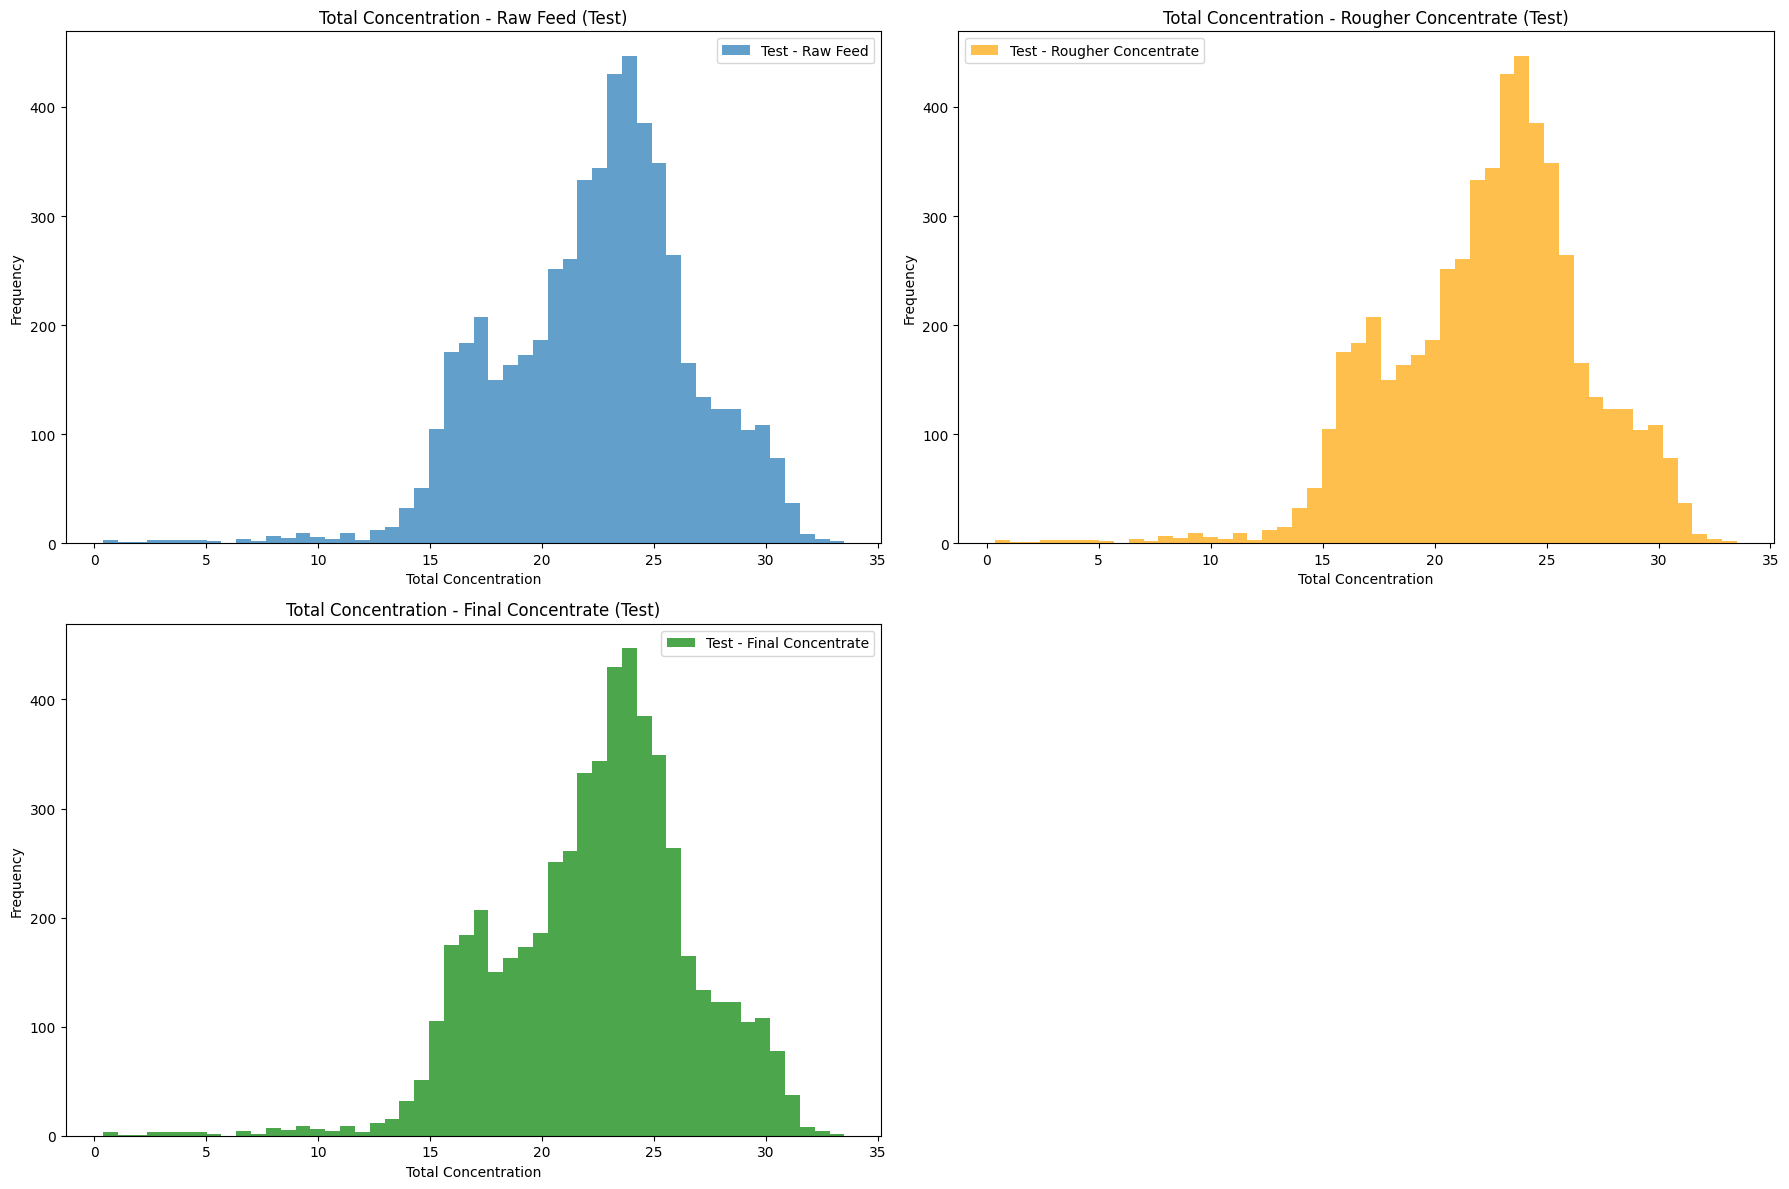

In [30]:
plt.figure(figsize=(18, 12))

# Test set
plt.subplot(2, 2, 1)
plt.hist(df_test['total_concentration_raw_feed'], bins=50, alpha=0.7, label='Test - Raw Feed')
plt.title('Total Concentration - Raw Feed (Test)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df_test['total_concentration_rougher'], bins=50, alpha=0.7, label='Test - Rougher Concentrate', color='orange')
plt.title('Total Concentration - Rougher Concentrate (Test)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(df_test['total_concentration_final'], bins=50, alpha=0.7, label='Test - Final Concentrate', color='green')
plt.title('Total Concentration - Final Concentrate (Test)')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

<div class="alert alert-success">
<b>Reviewer's comment</b>

Well done!

</div>

In [31]:
features_input_concentrate = [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
]
features_rough_concentrate = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
]
features_final_concentrate = [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
]


In [32]:
THRESHOLD = 0.01

df_train = df_train[df_train[features_input_concentrate].sum(1) > THRESHOLD]
df_train = df_train[df_train[features_rough_concentrate].sum(1) > THRESHOLD]
df_train = df_train[df_train[features_final_concentrate].sum(1) > THRESHOLD]

print(df_train.shape)

df_full_test = gold_df.loc[df_test.index]
df_test = df_test[df_full_test[features_input_concentrate].sum(1) > THRESHOLD]
df_test = df_test[df_full_test[features_rough_concentrate].sum(1) > THRESHOLD]
df_test = df_test[df_full_test[features_final_concentrate].sum(1) > THRESHOLD]

print(df_test.shape)

(15128, 89)
(5278, 55)


/tmp/ipykernel_302/1468957439.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test = df_test[df_full_test[features_final_concentrate].sum(1) > THRESHOLD]


# 3- Build the model

In [33]:
features = df_test.columns.values
targets = ['rougher.output.recovery', 'final.output.recovery']
features_train = df_train[features].reset_index(drop=True)
target_train = df_train[targets].reset_index(drop=True)
target_train.columns = [0, 1]
features_test = df_test[features].reset_index(drop=True)
target_test = gold_df[targets].loc[df_test.index].reset_index(drop=True)
target_test.columns = [0, 1]

In [34]:
def smape(y_true, y_pred):
    error = (y_true - y_pred).abs()
    scale = (y_true.abs() + y_pred.abs()) / 2
    
    return (error / scale).mean()


def smape_weighted(y_true, y_pred):
    rougher = smape(y_true[0], y_pred[0])
    final = smape(y_true[1], y_pred[1])
    return 0.25 * rougher + 0.75 * final

In [35]:
pred_median = target_train.copy()
pred_median[0] = target_train[0].median()
pred_median[1] = target_train[1].median()
print(smape_weighted(target_train, pred_median))

pred_median = target_test.copy()
pred_median[0] = target_train[0].median()
pred_median[1] = target_train[1].median()
print(smape_weighted(target_test, pred_median))

0.10817641108010018
0.07417351094625176


In [36]:
def score_model(model, cv=4):
    scores = []
    for subtrain_index, valid_index in KFold(n_splits=cv).split(features_train):
        features_subtrain = features_train.loc[subtrain_index].reset_index(drop=True)
        target_subtrain = target_train.loc[subtrain_index].reset_index(drop=True)
        features_valid = features_train.loc[valid_index].reset_index(drop=True)
        target_valid = target_train.loc[valid_index].reset_index(drop=True)
        
        model.fit(features_subtrain, target_subtrain)
        pred_valid = pd.DataFrame(model.predict(features_valid))
        
        scores.append(smape_weighted(target_valid, pred_valid))
        
    return pd.Series(scores).mean()

In [37]:
# Linear Regression Model
model = LinearRegression()
lr_score = score_model(model)
print("Linear Regression:", lr_score)

Linear Regression: 0.12073018556452603


SMAPE value of 0.12073018556452603 suggests that, on average, the model’s predictions deviate from the actual values by approximately 12.07%.

In [38]:
# Decision Tree Model
for depth in range(1, 5):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    score = score_model(model)
    print("Decision Tree, depth =", depth, "score =", score)


Decision Tree, depth = 1 score = 0.11371936376189459
Decision Tree, depth = 2 score = 0.11729231744388062
Decision Tree, depth = 3 score = 0.12058415722334467
Decision Tree, depth = 4 score = 0.10774906480028026


 a SMAPE value of 0.10774906480028026 for a Decision Tree with a depth of 4 suggests that, on average, the model’s predictions deviate from the actual values by approximately 10.77%.

In [39]:
# Random Forest Model
for depth in range(1, 5):
    model = RandomForestRegressor(max_depth=depth, n_estimators=50, random_state=12345)
    score = score_model(model)
    print("Random Forest, depth =", depth, "score =", score)

Random Forest, depth = 1 score = 0.1136930214947666
Random Forest, depth = 2 score = 0.11433454614147175
Random Forest, depth = 3 score = 0.11182566732812804
Random Forest, depth = 4 score = 0.1053290074444777


SMAPE value of 0.1053290074444777 for a Random Forest with a depth of 4 suggests that, on average, the model’s predictions deviate from the actual values by approximately 10.53%.

In [40]:
features_train = features_train.replace([np.inf, -np.inf], np.nan).fillna(features_train.mean())
features_test = features_test.replace([np.inf, -np.inf], np.nan).fillna(features_test.mean())
target_train = target_train.replace([np.inf, -np.inf], np.nan).fillna(target_train.mean())
target_test = target_test.replace([np.inf, -np.inf], np.nan).fillna(target_test.mean())

# Initialize the Random Forest Regressor
model = RandomForestRegressor(max_depth=4, n_estimators=50, random_state=12345)

# Fit the model on the training data
model.fit(features_train, target_train)

# Predict on the test set
pred_test = model.predict(features_test)

# Calculate the SMAPE for the test set
test_smape = smape(target_test, pd.DataFrame(pred_test))
print(f'Test SMAPE: {test_smape}')

# Predict on the final sample
pred_final = model.predict(features_test)

# Calculate the SMAPE for the final sample
final_smape = smape_weighted(target_test, pd.DataFrame(pred_final))
print(f'Final SMAPE: {final_smape}')

Test SMAPE: 0    0.057698
1    0.078191
dtype: float64
Final SMAPE: 0.07306763664185688


**Test SMAPE:**

0.057698: This value represents the SMAPE for the first target variable (likely rougher.output.recovery).

0.078191: This value represents the SMAPE for the second target variable (likely final.output.recovery).

These values indicate that, on average, the model’s predictions deviate from the actual values by approximately 5.77% and 7.82% for the first and second target variables, respectively.

**Final SMAPE:**

0.07306763664185688: This value represents the weighted average SMAPE for the final sample, combining both target variables. It 
suggests that, on average, the model’s predictions deviate from the actual values by approximately 7.31%.

Overall, these SMAPE values indicate that the Random Forest model is performing quite well, with relatively low prediction errors for both the test set and the final sample.

# Conclusion

In this project, we developed a machine learning model to predict gold recovery from gold ore, aiming to optimize production processes and eliminate unprofitable parameters. The steps involved included data preparation, data analysis, and model development and training.

**Key Findings:**

**Gold (Au) Concentration:**

Initial concentration is high with a broad distribution.

Concentration decreases through the rougher and primary cleaner stages, indicating purification.

Final stage shows the highest level of purification with the lowest concentration.

**Silver (Ag) Concentration:**

Initial concentration is high with a wide distribution.

Significant decrease after the rougher stage.

Continues to drop through the primary cleaner stage, with the final stage showing successful purification.

**Lead (Pb) Concentration:**

Initial concentration is high with a broad distribution.

Decreases consistently through each purification stage, with the final stage showing effective purification.
Overall Observations:

Each purification stage effectively reduces the concentration of metals (Au, Ag, Pb), with the final stage consistently showing the lowest concentrations.
The distribution of metal concentrations becomes narrower and shifts towards lower values as the material progresses through the purification stages, indicating a more uniform purification process.

**Model Performance:**

The Random Forest model outperformed other models, showing relatively low prediction errors.

**Test SMAPE:**

0.057698 for the first target variable (likely rougher.output.recovery).

0.078191 for the second target variable (likely final.output.recovery).

**Final SMAPE:**

0.07306763664185688, representing the weighted average SMAPE for the final sample.

These results indicate that the Random Forest model is performing well, with average deviations of approximately 5.77% and 7.82% for the test set, and 7.31% for the final sample. This demonstrates the model’s effectiveness in predicting gold recovery, providing valuable insights for optimizing production processes and improving operational efficiency.